<a href="https://colab.research.google.com/github/zasminah/Python_DataVisualization/blob/main/Pandas_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Datetime

## datetime module
* date 그레고리안 달력을 사용해서 날짜(년, 월, 일)을 저장
* time 하루 중 시간을 시간, 분, 초 마이크로초 단위로 저장
* datetime 날짜와 시간을 같이 저장
* timedelta 두 datetime 값 간의 차이(일,초,마이크로초)를 표현

## datetime포맷규칙
* %Y 네자리 연도
* %y 두자리 연도
* %m 두자리 월[01,12]
* %d 두자리 일[01,31]
* %I 12시 형식[01,12]
* %M 두자리 분[00,59]
* %s 초
* %w 정수로 나타낸 요일[0(일요일),6]
* %F %Y-%m-%d 형식에 대한 축약

In [ ]:
from datetime import datetime

stamp = datetime(2017, 1, 3)
print(str(stamp),'\n')
print(stamp.strftime('%Y-%m-%d'),'\n')

2017-01-03 00:00:00 

2017-01-03 



In [ ]:
value = '2017-01-03'
date1 = datetime.strptime(value, '%Y-%m-%d') #String을 Time 형태로 변환
print(date1,'\n')

2017-01-03 00:00:00 



In [ ]:
datestrs = ['7/6/2018', '8/6/2018']
print([datetime.strptime(x, '%m/%d/%Y') for x in datestrs],'\n')

[datetime.datetime(2018, 7, 6, 0, 0), datetime.datetime(2018, 8, 6, 0, 0)] 



In [ ]:
from dateutil.parser import parse  #문자열로 된 것을 바로 바꿔줌, 대부분의 formatting을 지원
print(parse('2017-01-03'),'\n')
print(parse('Jan 31, 2001 10:45 PM'),'\n')

2017-01-03 00:00:00 

2001-01-31 22:45:00 



#TimeSeries Indexing

dates = [ datetime(2019,1,2),datetime(2019.1.5),datetime(2019.1.7),datetime(2019.1.8), datetime(2019.1.10), datetime(2019.1.12)]

ts = pd.Series(np.random.randn(6), index=dates)

##TimeSeries 인덱싱
* TimeSeries는 Series의 하위 클래싀며, 라벨에 기반해 데이터를 선택, indexing 하는데 Series와 동일하게 동작한다.
* 해석할 수 있는 날짜를 문자열로 넘겨서 편리하게 사용할 수 있다.
** ts['1/10/2019'], ts['20190110']
* 긴 시계열에서는 년을 넘기거나 년, 월만 넘겨서 데이터의 일부 구간만 선택할 수 있다.
** longger_ts['2019'], longer_ts['2015-01']

* 대부분의 시계열 데이터는 연대순으로 정렬되기 때문에 범위를 지정하기 위해 시계열 데이터에 기재하지 않고 타임 스탬프를 이용해서 Series를 나눈다.
** ts['1/10/2019':''1/12/2019']
* TimeSeries는 위와 동일한 방법으로 데이터를 가져올 수 있는 truncate 메서드를 제공한다.
** ts.truncate(after='1/9/2019']
* DataFrame도 동일한 방식으로 로우를 인텍싱할 수 있다.
** dataFrame.loc['5-2019']

In [ ]:
np.random.seed(12345)

dates = [datetime(2017, 1, 2),datetime(2017, 1, 5),datetime(2017, 1, 7),
         datetime(2017, 1, 8),datetime(2017, 1, 10),datetime(2017, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
print(ts,'\n')
print(type(ts),'\n')
print(ts[2],'\n')

2017-01-02   -0.204708
2017-01-05    0.478943
2017-01-07   -0.519439
2017-01-08   -0.555730
2017-01-10    1.965781
2017-01-12    1.393406
dtype: float64 

<class 'pandas.core.series.Series'> 

-0.5194387150567381 



In [ ]:
print(ts['1/10/2017'],'\n')

1.9657805725027142 



In [ ]:
print(ts['20170110'],'\n')

1.9657805725027142 



In [ ]:
print(ts['1/6/2017':'1/11/2017'],'\n')

2017-01-07   -0.519439
2017-01-08   -0.555730
2017-01-10    1.965781
dtype: float64 



In [ ]:
print(ts.truncate(after='1/9/2017'))

2017-01-02   -0.204708
2017-01-05    0.478943
2017-01-07   -0.519439
2017-01-08   -0.555730
dtype: float64


#Pandas Indexing

## 날짜 범위 생성
* pandas.date_range()를 사용하면 특정 빈도에 따라 지정된 길이 만큼의 DataFrameIndex를 생성할 수 있다.
** index = pd.data_range('4/1/2019', '6/1/2019')
* 기본적으로 data_range 메서드는 일별 타임스탬프를 생성한다. 만약 시작하는 날짜나 끝나는 날짜만 넘긴다면 생성할 기간의 숫자를 함께 전달해야한다.
** pd.data_ragne(start='4/1/2019'. periods=20)

## 빈도와 날짜 오프셋
* pandas에서 빈도는 기본 빈도와 배수의 조합으로 이루어진다.
* 시간 빈도는 Hour 클래스를 사용하여 표현할 수 있고, 오프셋의 곱은 정수를 넘겨서 구할 수 있다.
** hour = Hour()
** third_hours = Hour(4)
* 대부분의 애플리케이션에서는 객체를 직접만들지 않고 'H', '4H'처럼 문자열로 표현
** pd.data_range('4/1/2019','5/1/2019', freq='4h')
** pd.data_range('4/1/2019', periods=10, freq='1h30min')

## 데이터 시프트
* 시프트는 데이터를 시간 축에서 앞잉나 뒤로 이동하는 것을 말한다.
* shift 메서드가 이 기능을 제공한다.
** ts.shift(2)
** ts.shift(-2)
* 빈도를 넘겨서 타임 스탬프를 확장 할수도 있다.
** ts.shift(2, freq='M')
** ts.shift(2, freq='3D')
** ts.shift(1, freq='90T')



In [ ]:
np.random.seed(12345)

index = pd.date_range('4/1/2012','6/1/2012')
print(index,'\n')
print(pd.date_range(start='4/1/2012', periods=20),'\n')
print(pd.date_range(end='6/1/2012', periods=20),'\n')

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [ ]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()
print(hour,'\n')
four_our = Hour(4)
print(four_our,'\n')
print(pd.date_range('1/1/2018', '1/3/2018 23:59', freq='4h'),'\n')
print(pd.date_range('1/1/2018', periods=10, freq='1h30min'),'\n')

<Hour> 

<4 * Hours> 

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 04:00:00',
               '2018-01-01 08:00:00', '2018-01-01 12:00:00',
               '2018-01-01 16:00:00', '2018-01-01 20:00:00',
               '2018-01-02 00:00:00', '2018-01-02 04:00:00',
               '2018-01-02 08:00:00', '2018-01-02 12:00:00',
               '2018-01-02 16:00:00', '2018-01-02 20:00:00',
               '2018-01-03 00:00:00', '2018-01-03 04:00:00',
               '2018-01-03 08:00:00', '2018-01-03 12:00:00',
               '2018-01-03 16:00:00', '2018-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H') 

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:30:00',
               '2018-01-01 03:00:00', '2018-01-01 04:30:00',
               '2018-01-01 06:00:00', '2018-01-01 07:30:00',
               '2018-01-01 09:00:00', '2018-01-01 10:30:00',
               '2018-01-01 12:00:00', '2018-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T') 



In [ ]:
rng = pd.date_range('1/1/2019', '9/1/2019', freq='WOM-2FRI') #월 별 주 차수
print(list(rng),'\n')

[Timestamp('2019-01-11 00:00:00', freq='WOM-2FRI'), Timestamp('2019-02-08 00:00:00', freq='WOM-2FRI'), Timestamp('2019-03-08 00:00:00', freq='WOM-2FRI'), Timestamp('2019-04-12 00:00:00', freq='WOM-2FRI'), Timestamp('2019-05-10 00:00:00', freq='WOM-2FRI'), Timestamp('2019-06-14 00:00:00', freq='WOM-2FRI'), Timestamp('2019-07-12 00:00:00', freq='WOM-2FRI'), Timestamp('2019-08-09 00:00:00', freq='WOM-2FRI')] 



#기간 연산

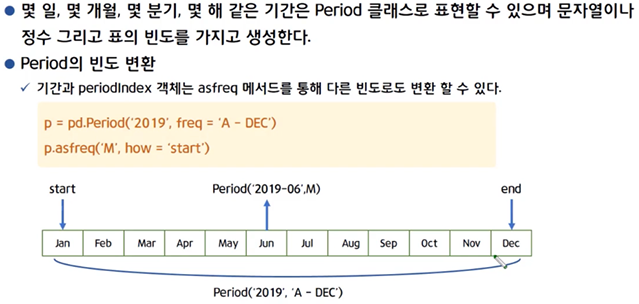

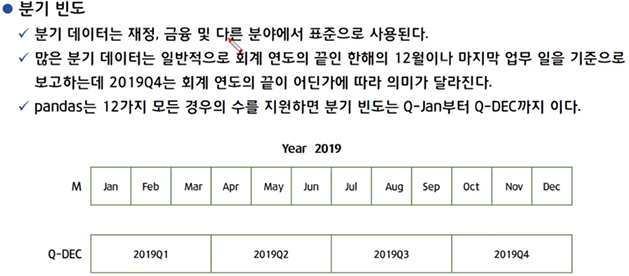

In [ ]:
p = pd.Period(2021, freq='A-DEC')
print('\n', p)
print('\n', p + 5)
print('\n', p - 2)
print('\n', pd.Period('2029', freq='A-DEC')-p)


 2021

 2026

 2019

 <8 * YearEnds: month=12>


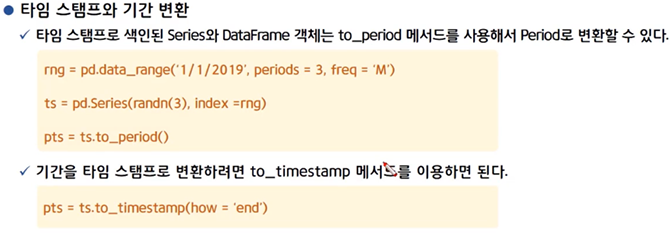

In [ ]:
rng = pd.date_range('1/1/2019', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
pts = ts.to_period('M')
print('\n',ts)
print('\n',pts)


 2019-01-31    0.092908
2019-02-28    0.281746
2019-03-31    0.769023
Freq: M, dtype: float64

 2019-01    0.092908
2019-02    0.281746
2019-03    0.769023
Freq: M, dtype: float64


In [ ]:
print('\n', pts.to_timestamp(how='end'))


 2019-01-31 23:59:59.999999999    0.092908
2019-02-28 23:59:59.999999999    0.281746
2019-03-31 23:59:59.999999999    0.769023
dtype: float64


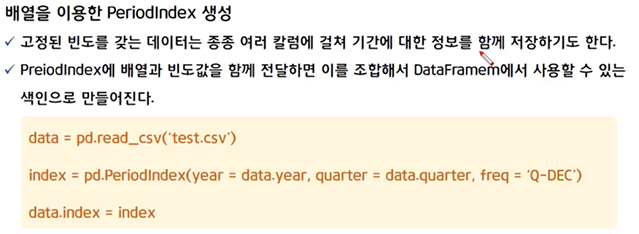

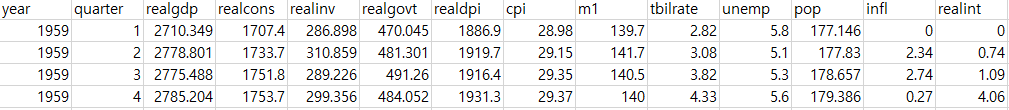

In [ ]:
# data = pd.read_csv('macrodata.csv')
# print(data)

# index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
# data.index = index
# print('\n',data)

#Resampling - 시간빈도 변환

ex) 1년->달별

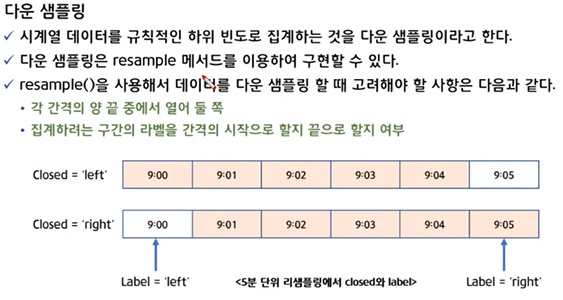

In [ ]:
np.random.seed(12345)
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
print(ts,'\n')

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64 



In [ ]:
print(ts.resample('5min').sum())
print(ts.resample('5min', closed='right').sum())
print('\n',ts.resample('5min', closed='right',label='right').sum())

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64
1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

 2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64


In [ ]:
print('groupby resampling')
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = pd.Series(np.arange(100), index=rng)
print('\n',ts)
print('\n', ts.groupby(lambda x:x.month).mean())

groupby resampling

 2000-01-01     0
2000-01-02     1
2000-01-03     2
2000-01-04     3
2000-01-05     4
              ..
2000-04-05    95
2000-04-06    96
2000-04-07    97
2000-04-08    98
2000-04-09    99
Freq: D, Length: 100, dtype: int64

 1    15
2    45
3    75
4    95
dtype: int64


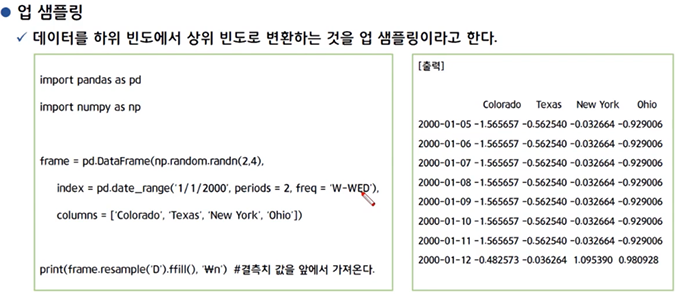

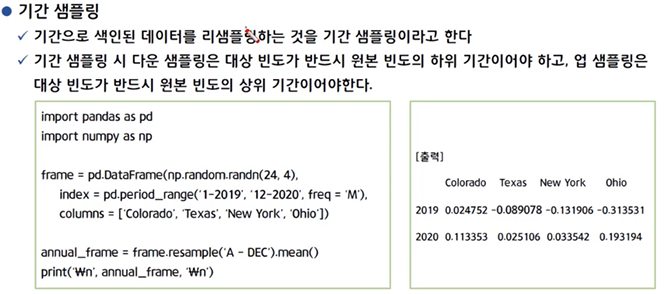

In [ ]:
frame = pd.DataFrame(np.random.randn(2,4),
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['Colorado','Texas','New York','Ohio'])
print(frame)
print('\n',frame.resample('D').ffill())
print('\n',frame.resample('D').ffill(limit=2)) #limit 2개로 인해 2ffill을 2개까지만 
print('\n',frame.resample('W-THU').ffill()) # thursday data만 가져오겠다 

            Colorado     Texas  New York      Ohio
2000-01-05 -0.482573 -0.036264  1.095390  0.980928
2000-01-12 -0.589488  1.581700 -0.528735  0.457002

             Colorado     Texas  New York      Ohio
2000-01-05 -0.482573 -0.036264  1.095390  0.980928
2000-01-06 -0.482573 -0.036264  1.095390  0.980928
2000-01-07 -0.482573 -0.036264  1.095390  0.980928
2000-01-08 -0.482573 -0.036264  1.095390  0.980928
2000-01-09 -0.482573 -0.036264  1.095390  0.980928
2000-01-10 -0.482573 -0.036264  1.095390  0.980928
2000-01-11 -0.482573 -0.036264  1.095390  0.980928
2000-01-12 -0.589488  1.581700 -0.528735  0.457002

             Colorado     Texas  New York      Ohio
2000-01-05 -0.482573 -0.036264  1.095390  0.980928
2000-01-06 -0.482573 -0.036264  1.095390  0.980928
2000-01-07 -0.482573 -0.036264  1.095390  0.980928
2000-01-08       NaN       NaN       NaN       NaN
2000-01-09       NaN       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN       NaN
2000-01-11       NaN       

In [ ]:
frame = pd.DataFrame(np.random.randn(24,4),
                     index=pd.period_range('1-2000','12-2001', freq='M'),
                     columns=['Colorado','Texas','New York','Ohio'])
print('\n',frame)
annual_frame = frame.resample('A-DEC').mean()
print('\n',annual_frame)


          Colorado     Texas  New York      Ohio
2000-01 -0.751921 -0.132609  1.457300  0.609512
2000-02 -0.493779  1.239980 -0.135722  1.430042
2000-03 -0.846852  0.603282  1.263572 -0.255491
2000-04 -0.445688  0.468367 -0.961604 -1.824505
2000-05  0.625428  1.022872  1.107425  0.090937
2000-06 -0.350109  0.217957 -0.894813 -1.741494
2000-07 -1.052256  1.436603 -0.576207 -2.420294
2000-08 -1.062330  0.237372  0.000957  0.065253
2000-09 -1.367524 -0.030280  0.940489 -0.642437
2000-10  1.040179 -1.082922  0.429214 -0.236224
2000-11  0.641818 -0.331661  1.394072 -1.076742
2000-12 -0.192466 -0.871188  0.420852 -1.211411
2001-01 -0.258867 -0.581647 -1.260421  0.464575
2001-02 -1.070241  0.804223 -0.156736  2.010390
2001-03 -0.887104 -0.977936 -0.267217  0.483338
2001-04 -0.400333  0.449880  0.399594 -0.151575
2001-05 -2.557934  0.160807  0.076525 -0.297204
2001-06 -1.294274 -0.885180 -0.187497 -0.493560
2001-07 -0.115413 -0.350745  0.044697 -0.897756
2001-08  0.890874 -1.151185 -2.612303 

In [ ]:
print('\n',annual_frame.resample('Q-DEC').ffill())


         Colorado     Texas  New York      Ohio
2000Q1 -0.354625  0.231481  0.370461 -0.601071
2000Q2 -0.354625  0.231481  0.370461 -0.601071
2000Q3 -0.354625  0.231481  0.370461 -0.601071
2000Q4 -0.354625  0.231481  0.370461 -0.601071
2001Q1 -0.391137 -0.136422 -0.425435  0.241799
2001Q2 -0.391137 -0.136422 -0.425435  0.241799
2001Q3 -0.391137 -0.136422 -0.425435  0.241799
2001Q4 -0.391137 -0.136422 -0.425435  0.241799
